In [1]:
import csv
%precision 2
#leemos todos los datos del fichero, recordar que el fichero actorMovies.csv fue modificado cambiando el nombre
#de The Rock y eliminando las comillas dobles
with open('actorMovies.csv', encoding="utf8") as csvfile:
    mpg = list(csv.DictReader(csvfile, delimiter=';'))

In [2]:
mpg[0].values() #enseñamos como se mostraria cada linea, se ve que hay que separar mas los datos

odict_values(['Karen Allen', "Malcolm X|National Lampoon's Animal House|Starman"])

In [3]:
len(mpg) #el numero de actores leidos

2908

<IPython.core.display.Javascript object>


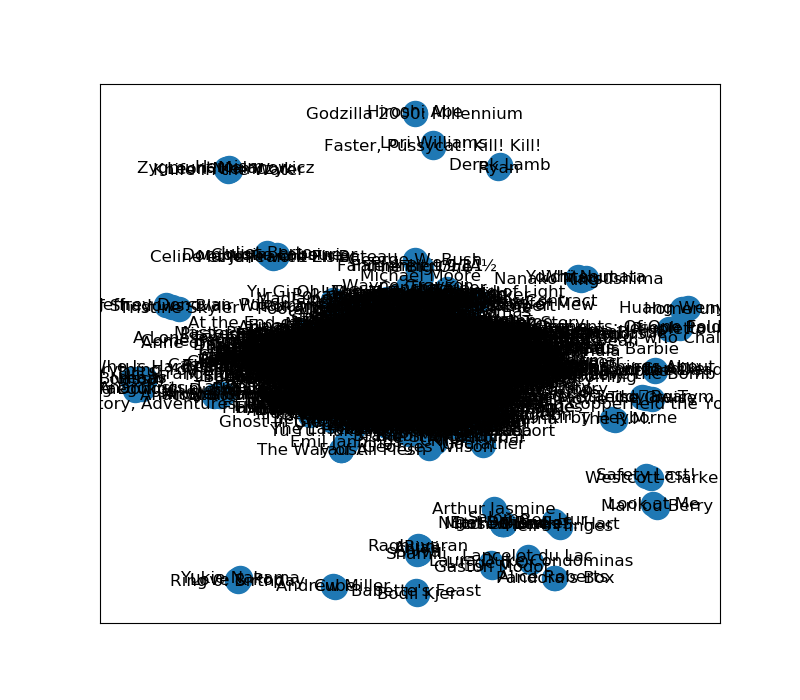

[('Karen Allen', 'Malcolm X'), ('Karen Allen', "National Lampoon's Animal House"), ('Karen Allen', 'Starman'), ('Malcolm X', 'Angela Bassett'), ('Malcolm X', 'Christopher Plummer'), ('Malcolm X', 'Delroy Lindo'), ('Malcolm X', 'Denzel Washington'), ('Malcolm X', 'Lonette McKee'), ('Malcolm X', 'Spike Lee'), ('Malcolm X', 'Theresa Randle'), ("National Lampoon's Animal House", 'Peter Riegert'), ("National Lampoon's Animal House", 'Kevin Bacon'), ("National Lampoon's Animal House", 'Bruce McGill'), ("National Lampoon's Animal House", 'Donald Sutherland'), ("National Lampoon's Animal House", 'Tom Hulce'), ("National Lampoon's Animal House", 'Stephen Furst'), ("National Lampoon's Animal House", 'John Vernon'), ("National Lampoon's Animal House", 'Verna Bloom'), ("National Lampoon's Animal House", 'John Belushi'), ("National Lampoon's Animal House", 'Tim Matheson'), ('Starman', 'Jeff Bridges'), ('Taye Diggs', 'House on Haunted Hill'), ('Taye Diggs', 'Go'), ('Taye Diggs', 'Basic'), ('Taye Dig

F:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [4]:
%matplotlib notebook
import networkx as nx
from networkx.algorithms import bipartite
from IPython.core.debugger import set_trace

import matplotlib.pyplot as plt

# dibujamos el grafo bipartito con el layout por defecto (spring) separando datos
plt.figure(figsize=(8,7))
BG = nx.Graph()

for elem in mpg:
    BG.add_node(elem['Actor'], bipartite=0)

    BG.add_nodes_from(elem['Movies'].split('|'), bipartite=1)
    
    for peli in elem['Movies'].split('|'):
        BG.add_edge(elem['Actor'], peli)

print(BG.edges)
nx.draw_networkx(BG)

In [5]:
bipartite.is_bipartite(BG) #comprobamos que el grafo actores - peliculas es bipartito

True

In [6]:
mpg[612] #mostramos esta linea para que se vea que hemos cambiado el nombre al actor The Rock para que no exista conflicto

OrderedDict([('Actor', 'The Rock Person'), ('Movies', 'Doom|Longshot')])

In [7]:
actor_nodes = {n for n, d in BG.nodes(data=True) if d['bipartite']==0} 
len(actor_nodes) #guardamos el conjunto de los actores y comprobamos la longitud

2908

In [8]:
pelis_nodes = set(BG) - actor_nodes #guardamos el conjunto de las peliculas
len(pelis_nodes) #este es el numero de nodos que tendra nuestro grafo, las peliculas

1894

In [9]:
#proyectamos el grafo bipartito sobre las peliculas para obtener el grafo que queremos
P0 = bipartite.projected_graph(BG, pelis_nodes)
print(P0.edges) #mostramos las aristas


[('Ghost World', 'Alive'), ('Ghost World', "John Carpenter's Escape from L.A."), ('Ghost World', 'Lost in Translation'), ('Ghost World', 'The Island'), ('Ghost World', 'Pulp Fiction'), ('Ghost World', 'North'), ('Ghost World', 'Roustabout'), ('Ghost World', 'Dumb & Dumber'), ('Ghost World', "Miller's Crossing"), ('Ghost World', 'Bully'), ('Ghost World', "The Man Who Wasn't There"), ('Ghost World', 'Silver City'), ('Ghost World', 'Armageddon'), ('Ghost World', "Cats Don't Dance"), ('Ghost World', 'The Black Stallion'), ('Ghost World', 'The Hole'), ('Ghost World', 'American Girl'), ('Ghost World', 'Austin Powers: International Man of Mystery'), ('Ghost World', 'Final Fantasy: The Spirits Within'), ('Ghost World', 'After Hours'), ('Ghost World', 'Dick'), ('Ghost World', 'Batman Beyond: Return of the Joker'), ('Ghost World', 'Cape Fear'), ('Ghost World', 'Fargo'), ('Ghost World', 'Big Daddy'), ('Ghost World', 'Tales from the Darkside: The Movie'), ('Ghost World', 'Desperado'), ('Ghost Worl

<IPython.core.display.Javascript object>


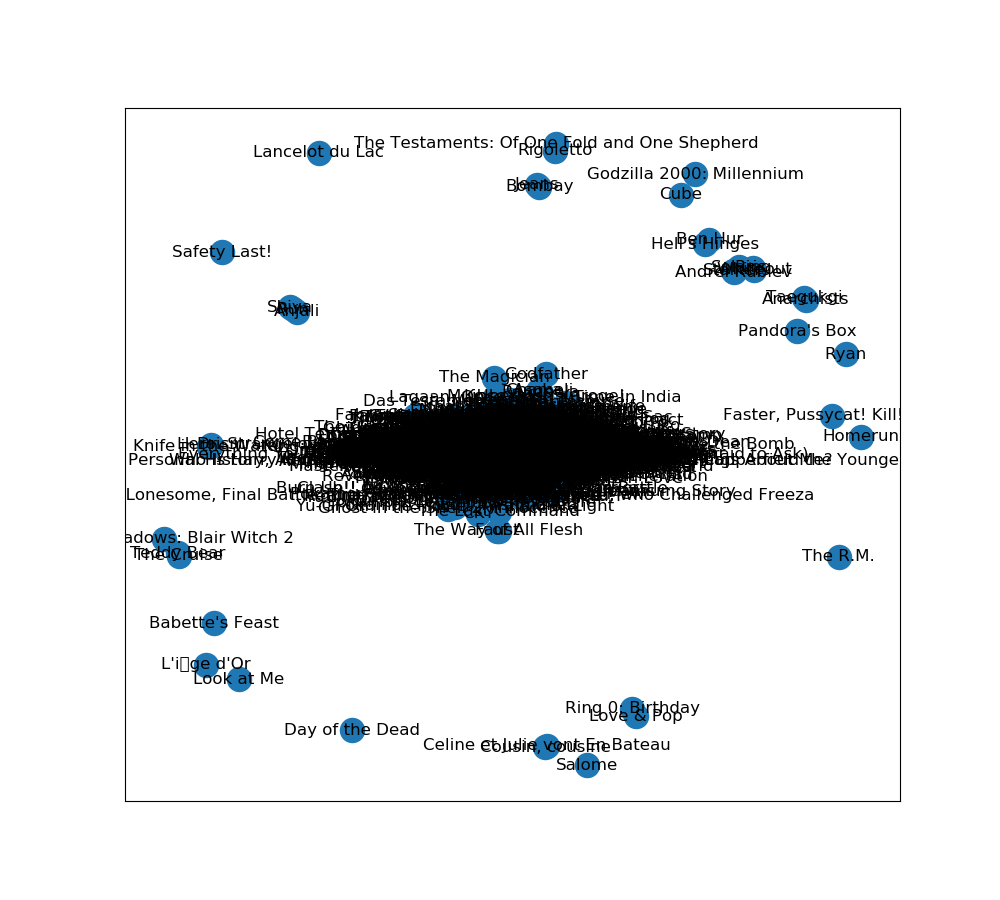

In [10]:
plt.figure(figsize=(10,9))
pos = nx.spring_layout(P0)
nx.draw_networkx(P0, pos) #mostramos el grafo final (la vision de este sera mejor con gephi)

In [13]:
#hacemos la lista de nodos para que gephi pueda leer el archivo correctamente
f=open("node_list.csv","w", encoding = "utf-8")
f.write("ID\tLabel\n")
cont=1
mapa = {}
for p in pelis_nodes:
    f.write(str(cont) + "\t" + p + "\n")
    mapa[p] = cont
    cont = cont + 1
f.close()  

In [14]:
#hacemos la lista de aristas para que gephi pueda leer el archivo correctamente
f=open("edge_list.csv","w", encoding = "utf-8")
f.write("Source\tTarget\n")
for e in P0.edges:
    f.write(str(mapa[e[0]]) + "\t" + str(mapa[e[1]]) + "\n")
f.close()